In total did 4 submissions from this notebook
One had bari shadeed cleaning and missing value imputation (kya missing value ki thi yaha oyehoye)
next had some paramters changes
next no cleaning/feature reduction done
last removed the cardiac related thing i did during one hot encoding

In [378]:
import pandas as pd
import numpy as np
from io import StringIO


In [379]:
dfTrain = pd.read_csv("Data/train.csv")
dfTest = pd.read_csv("Data/test.csv")



In [380]:
dfTrain

,RecordID,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
0,1,126,1931,Caucasian,M,Floor,transfer,Med-Surg ICU,Metabolic,Metabolic,...,86,93.0,86.0,NaN,NaN,0.01,0.00,0,0,0
1,2,112,1544,African American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular,...,95,95.0,95.0,333.0,3.7,NaN,NaN,0,0,0
2,3,153,1517,Caucasian,M,Floor,admit,MICU,Respiratory,Respiratory,...,162,174.0,162.0,160.0,4.2,0.38,0.15,0,0,0
3,4,109,1811,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic,...,140,163.0,140.0,258.0,3.8,0.12,0.06,0,0,0
4,5,287,1845,Caucasian,F,Accident & Emergency,admit,CSICU,Cardiovascular,Cardiovascular,...,119,119.0,119.0,110.0,3.9,0.15,0.07,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,110,1689,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Musculoskeletal/Skin,Undefined Diagnoses,...,98,98.0,98.0,98.0,3.9,0.02,0.01,0,0,0
49996,49997,155,1719,Caucasian,F,Floor,admit,Med-Surg ICU,Neurological,Neurologic,...,145,145.0,145.0,145.0,3.8,0.02,0.00,0,0,0
49997,49998,93,1912,Caucasian,F,Accident & Emergency,transfer,Med-Surg ICU,Sepsis,Cardiovascular,...,85,115.0,85.0,117.0,NaN,0.09,0.05,1,0,0
49998,49999,230,1720,Caucasian,M,Operating Room / Recovery,admit,Cardiac ICU,Cardiovascular,Cardiovascular,...,137,137.0,137.0,119.0,4.0,0.00,0.00,0,0,0


In [381]:
dfTrain.shape

(50000, 58)

In [382]:
dfTrain.dtypes

RecordID                           int64
hospital_id                        int64
icu_id                             int64
ethnicity                         object
gender                            object
icu_admit_source                  object
icu_stay_type                     object
icu_type                          object
apache_3j_bodysystem              object
apache_2_bodysystem               object
age                              float64
elective_surgery                   int64
pre_icu_los_days                 float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache                   int64
resprate_apache                  float64
temp_apache                      float64
ventilated_apach

In [383]:
dfTrain.isnull().sum()

RecordID                            0
hospital_id                         0
icu_id                              0
ethnicity                         576
gender                              4
icu_admit_source                   47
icu_stay_type                       0
icu_type                            0
apache_3j_bodysystem              276
apache_2_bodysystem               276
age                              1801
elective_surgery                    0
pre_icu_los_days                    0
apache_2_diagnosis                276
apache_3j_diagnosis                64
apache_post_operative               0
gcs_eyes_apache                   405
gcs_motor_apache                  405
gcs_unable_apache                  42
gcs_verbal_apache                 405
heart_rate_apache                   2
intubated_apache                    0
resprate_apache                    62
temp_apache                      1249
ventilated_apache                   0
d1_diasbp_min                       0
d1_diasbp_no

In [384]:
null_sums = dfTrain.isnull().sum()
null_sums = null_sums[null_sums > 0]
print(null_sums)
print("Number of columns with null values > 0: ", len(null_sums))


ethnicity                         576
gender                              4
icu_admit_source                   47
apache_3j_bodysystem              276
apache_2_bodysystem               276
age                              1801
apache_2_diagnosis                276
apache_3j_diagnosis                64
gcs_eyes_apache                   405
gcs_motor_apache                  405
gcs_unable_apache                  42
gcs_verbal_apache                 405
heart_rate_apache                   2
resprate_apache                    62
temp_apache                      1249
d1_mbp_noninvasive_min             95
d1_resprate_max                    13
d1_spo2_min                        41
d1_temp_min                       786
h1_diasbp_min                       1
h1_diasbp_noninvasive_min          16
h1_heartrate_max                   34
h1_heartrate_min                   34
h1_mbp_max                        349
h1_mbp_min                        349
h1_mbp_noninvasive_max            734
h1_mbp_nonin

In [385]:
# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find the highest correlation value and its corresponding columns
highest_corr = upper.stack().sort_values(ascending=False)

# Find all correlations with a value greater than 0.6
high_corr = highest_corr[highest_corr > 0.6]

# Print the highest correlation value and its corresponding columns
print("Highest correlation value and its corresponding columns:")
print(high_corr)




Highest correlation value and its corresponding columns:
Series([], dtype: float64)


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\2075142470.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [386]:
# create correlation matrix
corr_matrix = dfTrain.corr()

# select the 'hospital_death' column and sort the correlations in descending order
corr_with_hospital_death = corr_matrix['hospital_death'].sort_values(ascending=False)

# print the correlations
print(corr_with_hospital_death)



C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\1089255485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


hospital_death                   1.000000
apache_4a_hospital_death_prob    0.347165
apache_4a_icu_death_prob         0.321235
ventilated_apache                0.234896
intubated_apache                 0.190526
d1_heartrate_max                 0.168749
h1_resprate_max                  0.123930
heart_rate_apache                0.116381
h1_heartrate_max                 0.114889
age                              0.113619
d1_resprate_max                  0.109300
d1_potassium_max                 0.108348
h1_resprate_min                  0.105395
resprate_apache                  0.090630
h1_heartrate_min                 0.087107
d1_glucose_max                   0.081836
pre_icu_los_days                 0.076840
solid_tumor_with_metastasis      0.050262
gcs_unable_apache                0.047305
immunosuppression                0.042030
RecordID                         0.001134
hospital_id                     -0.001265
icu_id                          -0.001807
h1_spo2_max                     -0

In [387]:
#next we drop simialr record columns
dfTrain = dfTrain.drop('apache_3j_bodysystem', axis=1)
dfTest = dfTest.drop('apache_3j_bodysystem', axis=1)

In [389]:
dfTrain.shape

(50000, 57)

In [390]:
dfTest.shape

(30000, 56)

In [396]:

#next we drop columns that have less -0.1<corelation<0.1 with hospital_death
# create correlation matrix
corr_matrix = dfTrain.corr()

# get the columns with correlation less than -0.1 and greater than 0.1
corr_cols = corr_matrix.columns[(corr_matrix['hospital_death'] > -0.1) & (corr_matrix['hospital_death'] < 0.1)]

# remove the first element of the array
corr_cols = corr_cols[1:]
corr_cols
# drop the columns with correlation gr8 than -0.1 and less than 0.1
# FILEPATH: c:\Users\hamza\Documents\7th Sem\IDM\Challenge 1\C1.ipynb
dfTrain = dfTrain.drop(corr_cols, axis=1)
dfTest=dfTest.drop(corr_cols, axis=1)


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\3604662654.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\4191606928.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()
C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\4191606928.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\4191606928.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-o

<AxesSubplot: xlabel='Feature 2', ylabel='Feature 1'>

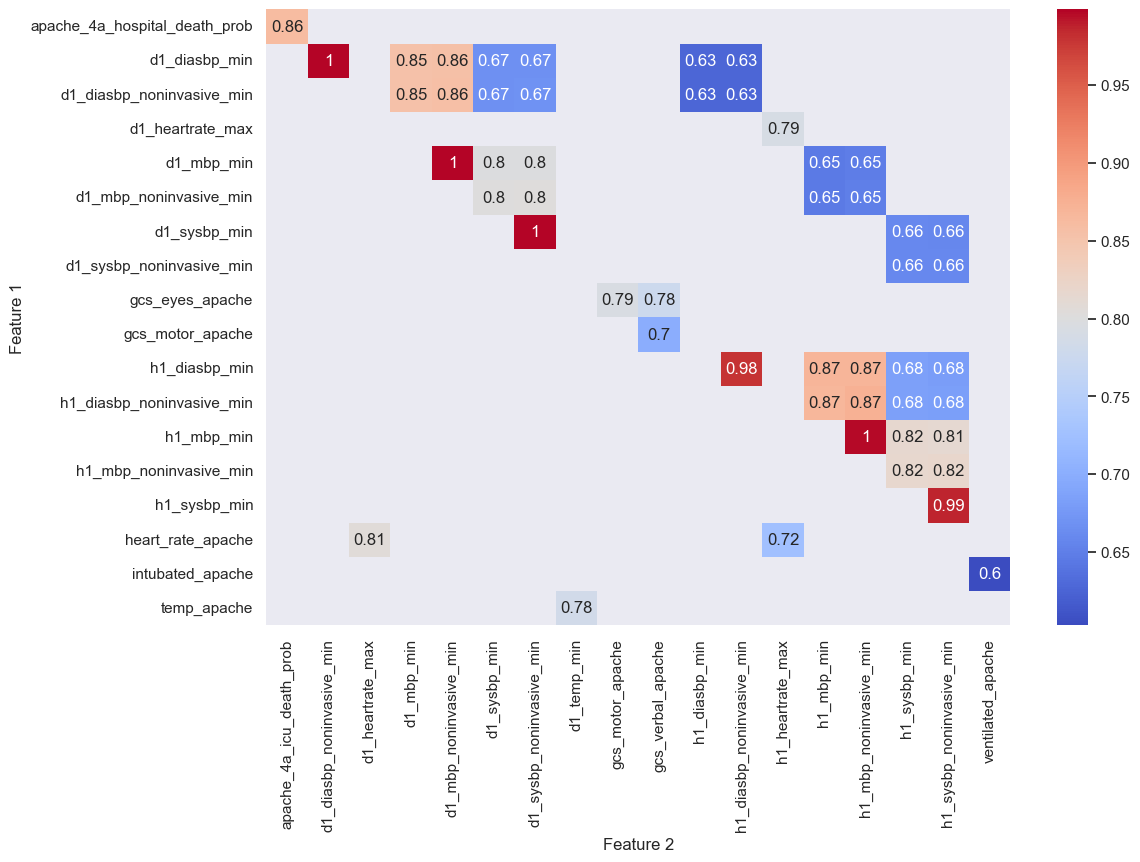

In [399]:
import seaborn as sns

# create correlation matrix
corr_matrix = dfTrain.corr()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find all correlations with a value greater than 0.6
high_corr = upper.stack().sort_values(ascending=False)[upper.stack() > 0.6]

# create a new dataframe with only the highest correlations
df_high_corr = pd.DataFrame(high_corr).reset_index()
df_high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# plot the heatmap with a wider figure
sns.heatmap(df_high_corr.pivot('Feature 1', 'Feature 2', 'Correlation'), annot=True, cmap='coolwarm')


In [400]:
dfTrain.shape

(50000, 39)

In [401]:
# now we will remove the columns that have a greater than 0.9 and less than 1 correlation to remove dependency between columns
# create correlation matrix
corr_matrix = dfTrain.corr()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find all correlations with a value greater than 0.9 and less than 1
high_corr = upper.stack().sort_values(ascending=False)[(upper.stack() > 0.99) & (upper.stack() < 1)]

# get the columns with high correlation
high_corr_cols = set(high_corr.index.get_level_values(0)) | set(high_corr.index.get_level_values(1))
print(len(high_corr_cols))
print(high_corr_cols)

# drop the columns with high correlation
# dfTrain = dfTrain.drop(high_corr_cols, axis=1)


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\1630113128.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


8
{'h1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_diasbp_min', 'd1_mbp_min', 'd1_sysbp_min', 'h1_mbp_noninvasive_min', 'd1_diasbp_noninvasive_min', 'd1_sysbp_noninvasive_min'}


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\1630113128.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [402]:
dfTest.shape

(30000, 38)

In [403]:
# set the correlation threshold
corr_threshold = 0.9

# create correlation matrix
corr_matrix = dfTrain.corr()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find all correlations with a value greater than the threshold
high_corr = upper.stack().sort_values(ascending=False)[upper.stack() > corr_threshold]

# get the columns with high correlation
high_corr_cols = set(high_corr.index.get_level_values(0)) | set(high_corr.index.get_level_values(1))

# drop the columns with correlation >0.99
high_corr_cols = list(high_corr_cols)
high_corr_cols.sort(key=lambda x: abs(corr_matrix.loc[x, 'hospital_death']), reverse=True)
high_corr_cols = high_corr_cols[:8]
dfTrain = dfTrain.drop(high_corr_cols, axis=1)
dfTest = dfTest.drop(high_corr_cols, axis=1)

# print the columns with high correlation
print("Columns with high interdependency:")
print(high_corr_cols)


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\1033782445.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


Columns with high interdependency:
['d1_sysbp_noninvasive_min', 'd1_sysbp_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'h1_sysbp_min', 'h1_sysbp_noninvasive_min']


C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\1033782445.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [404]:
#we can see d1_mbp_noninvasive_min  has high dpenedency with moe than one, d1_sysbp_min and d1_sysbp_noninvasive_min as well
dfTrain.shape

(50000, 31)

In [405]:
dfTest.shape

(30000, 30)

In [406]:
null_sums = dfTrain.isnull().sum()
null_sums = null_sums[null_sums > 1000]
print(null_sums)


age                              1801
temp_apache                      1249
d1_potassium_max                 4262
apache_4a_hospital_death_prob    3693
apache_4a_icu_death_prob         3693
dtype: int64


In [407]:
null_sums = dfTest.isnull().sum()
null_sums = null_sums[null_sums > 1000]
print(null_sums)


age                              1111
d1_potassium_max                 2587
apache_4a_hospital_death_prob    2146
apache_4a_icu_death_prob         2146
dtype: int64


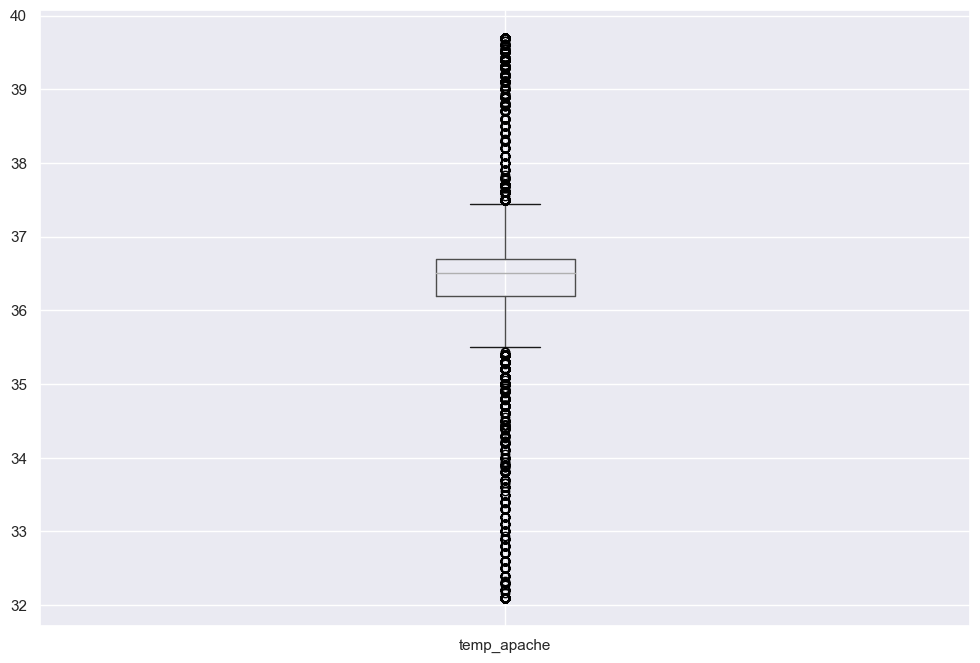

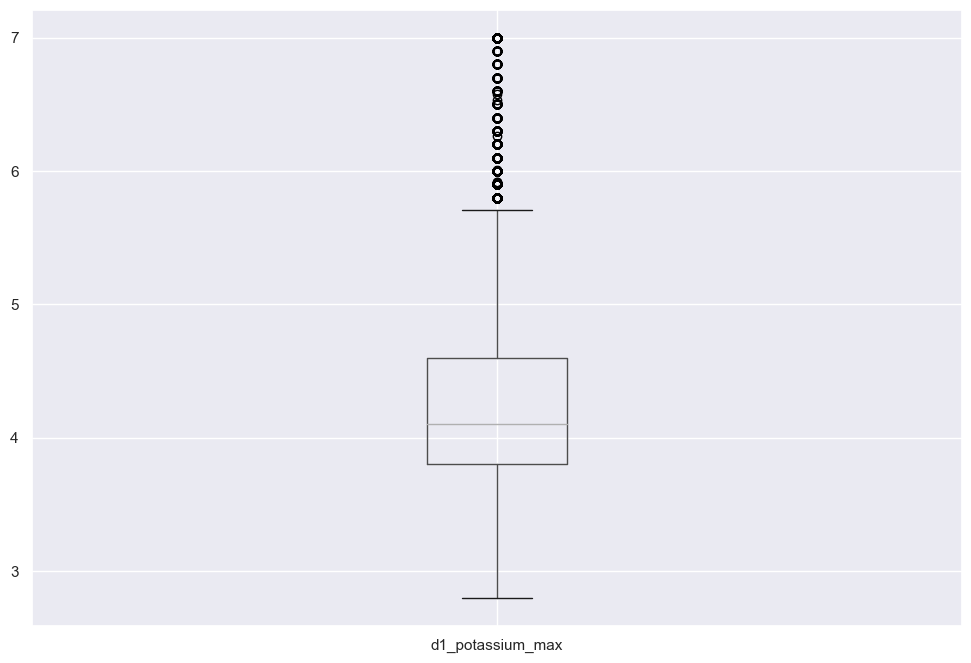

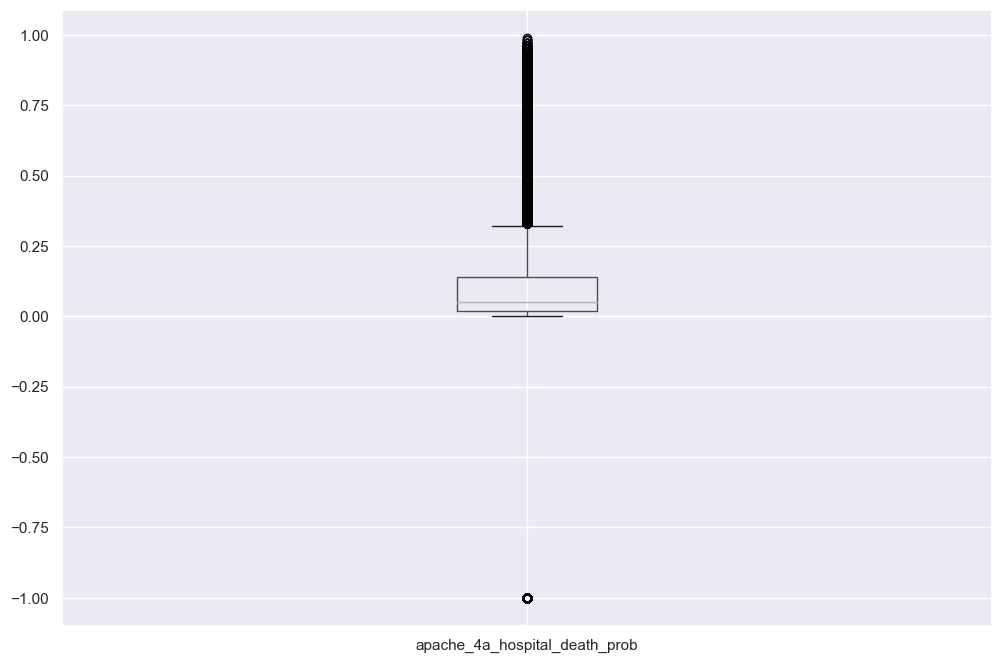

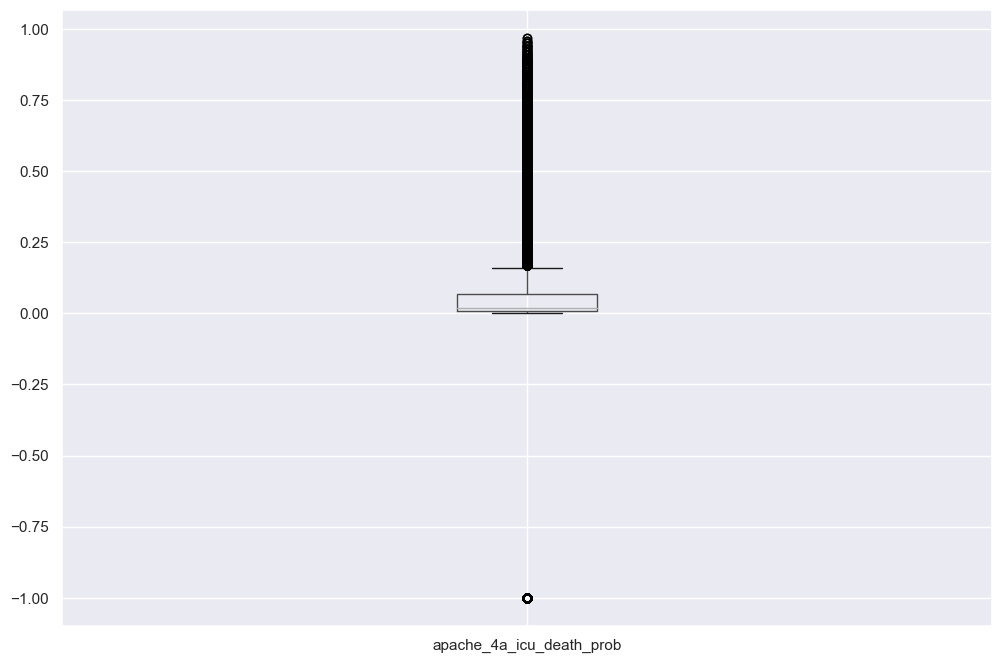

In [408]:
import matplotlib.pyplot as plt

# create the box plots
dfTrain[['temp_apache']].boxplot()
# show the plot
plt.show()
dfTrain[['d1_potassium_max']].boxplot()
# show the plot
plt.show()
dfTrain[['apache_4a_hospital_death_prob']].boxplot()
# show the plot
plt.show()
dfTrain[['apache_4a_icu_death_prob']].boxplot()
# show the plot
plt.show()




In [409]:
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

# fill null values with median for temp_apache
dfTrain['temp_apache'].fillna(dfTrain['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
dfTrain['d1_potassium_max'].fillna(dfTrain['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
dfTrain['apache_4a_hospital_death_prob'].fillna(dfTrain['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
dfTrain['apache_4a_icu_death_prob'].fillna(dfTrain['apache_4a_icu_death_prob'].median(), inplace=True)


In [410]:
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

# fill null values with median for d1_potassium_max
dfTest['d1_potassium_max'].fillna(dfTest['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
dfTest['apache_4a_hospital_death_prob'].fillna(dfTest['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
dfTest['apache_4a_icu_death_prob'].fillna(dfTest['apache_4a_icu_death_prob'].median(), inplace=True)


In [411]:
null_sums = dfTrain.isnull().sum()
null_sums = null_sums[null_sums > 1000]
print(null_sums)

age    1801
dtype: int64


In [412]:
null_sums = dfTest.isnull().sum()
null_sums = null_sums[null_sums > 1000]
print(null_sums)

age    1111
dtype: int64


<AxesSubplot: >

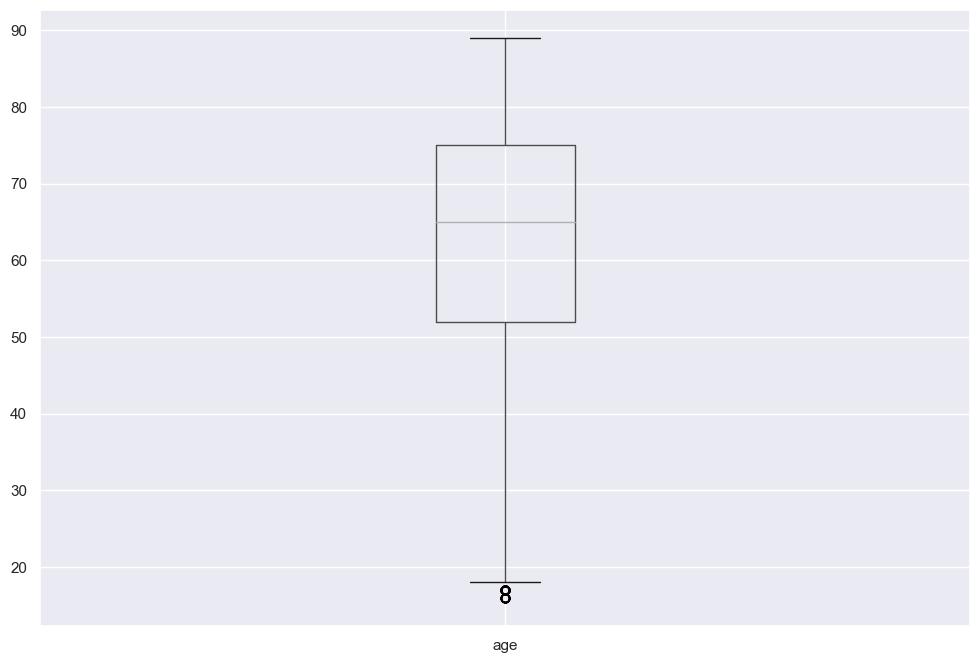

In [413]:
#age we will look atseperately
#make a boxlot for age
dfTrain[['age']].boxplot()

In [414]:
# create correlation matrix
corr_matrix = dfTrain.corr()

# select the 'age' column and sort the correlations in descending order
corr_with_age = corr_matrix['age'].sort_values(ascending=False)

# print the correlations
print(corr_with_age)


age                              1.000000
apache_4a_hospital_death_prob    0.155878
hospital_death                   0.113619
apache_4a_icu_death_prob         0.081668
d1_potassium_max                 0.062118
h1_resprate_min                  0.038678
ventilated_apache                0.032976
h1_resprate_max                  0.029953
gcs_eyes_apache                  0.029605
d1_resprate_max                  0.029380
gcs_motor_apache                 0.026804
intubated_apache                 0.005573
RecordID                         0.002283
gcs_verbal_apache               -0.015534
d1_temp_min                     -0.066423
temp_apache                     -0.080967
h1_spo2_min                     -0.082781
d1_spo2_min                     -0.090210
h1_mbp_noninvasive_min          -0.102839
h1_mbp_min                      -0.103210
d1_heartrate_max                -0.133597
heart_rate_apache               -0.147307
h1_heartrate_max                -0.162799
h1_diasbp_noninvasive_min       -0

C:\Users\hamza\AppData\Local\Temp\ipykernel_11544\3348287931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


In [415]:
dfTrain.columns

Index(['RecordID', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type',
       'icu_type', 'apache_2_bodysystem', 'age', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'temp_apache', 'ventilated_apache',
       'd1_heartrate_max', 'd1_resprate_max', 'd1_spo2_min', 'd1_temp_min',
       'h1_diasbp_min', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max',
       'h1_mbp_min', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_min', 'd1_potassium_max',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'hospital_death'],
      dtype='object')

In [416]:
# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = dfTrain.groupby('apache_2_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
dfTrain['age'] = dfTrain.apply(fill_age, axis=1)


In [417]:
# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = dfTest.groupby('apache_2_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
dfTest['age'] = dfTest.apply(fill_age, axis=1)


In [418]:
null_sums = dfTrain.isnull().sum()
null_sums = null_sums[null_sums > 1000]
print(null_sums)

Series([], dtype: int64)


In [419]:
dfTrain.isnull().sum()

RecordID                           0
ethnicity                        576
gender                             4
icu_admit_source                  47
icu_stay_type                      0
icu_type                           0
apache_2_bodysystem              276
age                                1
gcs_eyes_apache                  405
gcs_motor_apache                 405
gcs_verbal_apache                405
heart_rate_apache                  2
intubated_apache                   0
temp_apache                        0
ventilated_apache                  0
d1_heartrate_max                   0
d1_resprate_max                   13
d1_spo2_min                       41
d1_temp_min                      786
h1_diasbp_min                      1
h1_diasbp_noninvasive_min         16
h1_heartrate_max                  34
h1_mbp_min                       349
h1_mbp_noninvasive_min           734
h1_resprate_max                  626
h1_resprate_min                  626
h1_spo2_min                      518
d

In [420]:
# fill null values with mean for numerical columns and mode for categorical columns
for col in dfTrain.columns:
    if dfTrain[col].dtype == 'object':
        dfTrain[col].fillna(dfTrain[col].mode()[0], inplace=True) #mode if object
    else:
        dfTrain[col].fillna(dfTrain[col].mean(), inplace=True)


In [421]:
# fill null values with mean for numerical columns and mode for categorical columns
for col in dfTest.columns:
    if dfTest[col].dtype == 'object':
        dfTest[col].fillna(dfTest[col].mode()[0], inplace=True) #mode if object
    else:
        dfTest[col].fillna(dfTest[col].mean(), inplace=True)


In [423]:
dfTest.isnull().sum()

RecordID                         0
ethnicity                        0
gender                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
apache_2_bodysystem              0
age                              0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
temp_apache                      0
ventilated_apache                0
d1_heartrate_max                 0
d1_resprate_max                  0
d1_spo2_min                      0
d1_temp_min                      0
h1_diasbp_min                    0
h1_diasbp_noninvasive_min        0
h1_heartrate_max                 0
h1_mbp_min                       0
h1_mbp_noninvasive_min           0
h1_resprate_max                  0
h1_resprate_min                  0
h1_spo2_min                      0
d1_potassium_max                 0
apache_4a_hospital_d

NOW WE HAVE CLEAN DATASET

DECISION TREE

In [119]:
%pip install scikit-learn
import sklearn
sklearn.__version__

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/59/ed/548f6f686845d386a727a51a3daa411d95fc599649a2d54705f6773ac259/scikit_learn-1.3.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.3 MB 279.3 kB/s eta 0:00:33
   ---------------------------------------- 0.1/9.3 MB 476.3 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.3 MB 544.7 kB/s eta 0:00:17
    --------------------------------------- 0.1/9.3 MB 532.5 kB/s eta 0:00:18
    --------------------------------

'1.3.1'

In [424]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler


In [425]:
typesobject=dfTrain.dtypes[dfTrain.dtypes=='object'].index.tolist()
typesobject

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_2_bodysystem']

In [426]:
typesNOTobject=dfTrain.dtypes[dfTrain.dtypes!='object'].index.tolist()
typesNOTobject

['RecordID',
 'age',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_heartrate_max',
 'd1_resprate_max',
 'd1_spo2_min',
 'd1_temp_min',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_min',
 'd1_potassium_max',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'hospital_death']

no need to convert any

In [427]:
dfTrain['icu_type'].value_counts()


Med-Surg ICU    27852
MICU             4539
Neuro ICU        4309
CCU-CTICU        3872
SICU             3030
Cardiac ICU      2676
CSICU            2238
CTICU            1484
Name: icu_type, dtype: int64

In [428]:
dfTest['icu_type'].value_counts()


Med-Surg ICU    16728
MICU             2764
Neuro ICU        2601
CCU-CTICU        2302
SICU             1748
Cardiac ICU      1549
CSICU            1350
CTICU             958
Name: icu_type, dtype: int64

In [429]:
dfTrain['icu_type'] = dfTrain['icu_type'].replace(['Cardiac ICU', 'CSICU', 'CTICU', 'CCU-CTICU'], 'Cardiac related')

In [430]:
dfTest['icu_type'] = dfTrain['icu_type'].replace(['Cardiac ICU', 'CSICU', 'CTICU', 'CCU-CTICU'], 'Cardiac related')

In [431]:
dfTrain['icu_type'].value_counts()


Med-Surg ICU       27852
Cardiac related    10270
MICU                4539
Neuro ICU           4309
SICU                3030
Name: icu_type, dtype: int64

In [432]:
dfTest['icu_type'].value_counts()


Med-Surg ICU       16752
Cardiac related     6120
MICU                2703
Neuro ICU           2597
SICU                1828
Name: icu_type, dtype: int64

In [433]:
dfTrain['apache_2_bodysystem'].value_counts()


Cardiovascular         21502
Neurologic              6838
Respiratory             6518
Gastrointestinal        5062
Metabolic               4391
Trauma                  2202
Undefined diagnoses     1556
Renal/Genitourinary     1393
Haematologic             345
Undefined Diagnoses      193
Name: apache_2_bodysystem, dtype: int64

In [434]:
dfTest['apache_2_bodysystem'].value_counts()


Cardiovascular         12895
Respiratory             4031
Neurologic              3929
Gastrointestinal        3089
Metabolic               2637
Trauma                  1301
Undefined diagnoses      967
Renal/Genitourinary      795
Haematologic             240
Undefined Diagnoses      116
Name: apache_2_bodysystem, dtype: int64

In [435]:
dfTrain['apache_2_bodysystem'] = dfTrain['apache_2_bodysystem'].replace(['Undefined Diagnoses'], 'Undefined diagnoses')

In [436]:
dfTest['apache_2_bodysystem'] = dfTest['apache_2_bodysystem'].replace(['Undefined Diagnoses'], 'Undefined diagnoses')

In [437]:
dfTrain['apache_2_bodysystem'].value_counts()


Cardiovascular         21502
Neurologic              6838
Respiratory             6518
Gastrointestinal        5062
Metabolic               4391
Trauma                  2202
Undefined diagnoses     1749
Renal/Genitourinary     1393
Haematologic             345
Name: apache_2_bodysystem, dtype: int64

In [438]:
df_onehot = pd.get_dummies(dfTrain)
df_onehot.dtypes

RecordID                                        int64
age                                           float64
gcs_eyes_apache                               float64
gcs_motor_apache                              float64
gcs_verbal_apache                             float64
heart_rate_apache                             float64
intubated_apache                                int64
temp_apache                                   float64
ventilated_apache                               int64
d1_heartrate_max                                int64
d1_resprate_max                               float64
d1_spo2_min                                   float64
d1_temp_min                                   float64
h1_diasbp_min                                 float64
h1_diasbp_noninvasive_min                     float64
h1_heartrate_max                              float64
h1_mbp_min                                    float64
h1_mbp_noninvasive_min                        float64
h1_resprate_max             

In [439]:
df_onehotTest = pd.get_dummies(dfTest)
df_onehotTest.dtypes

RecordID                                        int64
age                                           float64
gcs_eyes_apache                               float64
gcs_motor_apache                              float64
gcs_verbal_apache                             float64
heart_rate_apache                             float64
intubated_apache                                int64
temp_apache                                   float64
ventilated_apache                               int64
d1_heartrate_max                                int64
d1_resprate_max                               float64
d1_spo2_min                                   float64
d1_temp_min                                   float64
h1_diasbp_min                                 float64
h1_diasbp_noninvasive_min                     float64
h1_heartrate_max                              float64
h1_mbp_min                                    float64
h1_mbp_noninvasive_min                        float64
h1_resprate_max             

In [440]:
df_onehot.shape


(50000, 55)

In [441]:
df_onehotTest.shape

(30000, 54)

first we will divide the test data itself and check for best model

In [442]:
X = df_onehot.loc[:, df_onehot.columns != 'hospital_death']
y = df_onehot[['hospital_death']]

In [443]:
print(y.value_counts())

hospital_death
0                 45662
1                  4338
dtype: int64


In [444]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, random_state=42)

In [445]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    plt.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

In [ ]:
def fit_model(model, model_name):
    model.fit(trainX_scaled,trainy)
    md_probs = model.predict_proba(testX_scaled)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    plt.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.8495945354394627
Depth 7 Split 2  :  0.8338660793913113
Depth 5 Split 5  :  0.8495945354394627
Depth 7 Split 5  :  0.8347546343785853
Depth 3 Split 2  :  0.8352059819600948
Depth 3 Split 5  :  0.8352059819600948


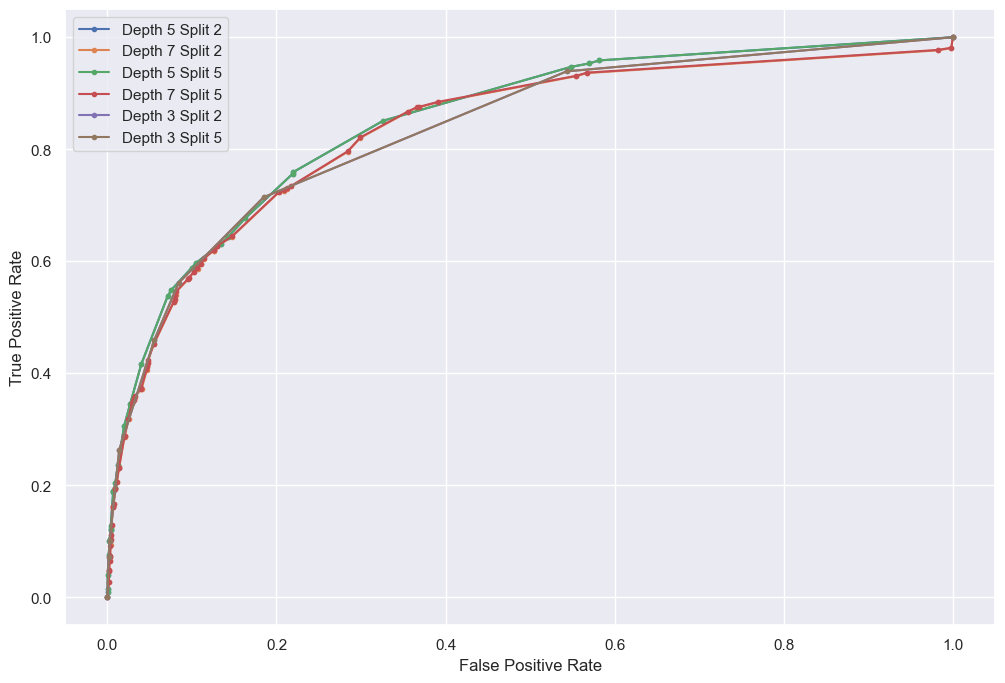

In [463]:
#scaled version
from sklearn.preprocessing import StandardScaler

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
trainX_scaled = scaler.fit_transform(trainX)

# Apply the scaler to the test data
testX_scaled = scaler.transform(testX)

# Then use trainX_scaled and testX_scaled in place of trainX and testX
SCALED_dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(SCALED_dt_5_2, "Depth 5 Split 2") #BEST

SCALED_dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(SCALED_dt_7_2, "Depth 7 Split 2") 

SCALED_dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=3)  
fit_model(SCALED_dt_5_5, "Depth 5 Split 5") #BEST

SCALED_dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(SCALED_dt_7_5, "Depth 7 Split 5") 

SCALED_dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(SCALED_dt_3_2, "Depth 3 Split 2") 

SCALED_dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(SCALED_dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



Depth 5 Split 2  :  0.860113430049734
Depth 7 Split 2  :  0.8504610373506041
Depth 5 Split 5  :  0.860113430049734
Depth 7 Split 5  :  0.8544726917841544
Depth 3 Split 2  :  0.8404472833772868
Depth 3 Split 5  :  0.8404472833772868


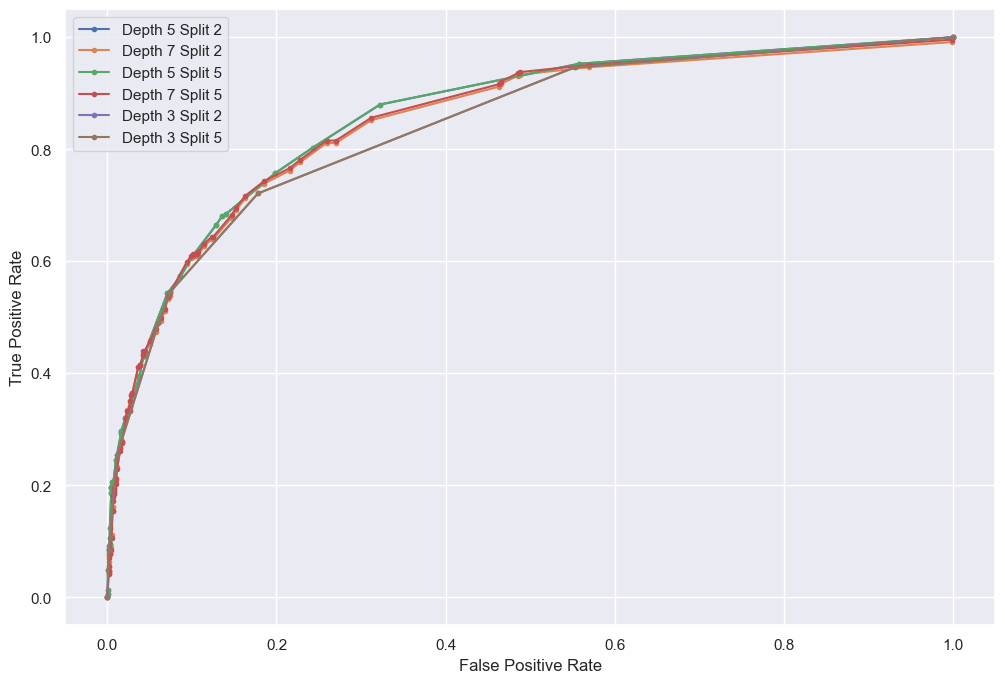

In [462]:
import matplotlib.pyplot as plt

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, random_state=2)
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") #BEST

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=3)  
fit_model(dt_5_5, "Depth 5 Split 5") #BEST

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 

dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(dt_3_2, "Depth 3 Split 2") 

dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [464]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter values that should be searched
max_depth_values = list(range(1, 11)) # depth of the tree
min_samples_split_values = list(range(2, 11)) # minimum number of samples required to split an internal node

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=max_depth_values, min_samples_split=min_samples_split_values)

# Instantiate the grid
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
# Fit the grid with data
grid.fit(trainX, trainy)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)


{'mean_fit_time': array([0.15335615, 0.17386096, 0.15606446, 0.15159416, 0.14817572,
       0.14546161, 0.15526576, 0.14470005, 0.14337306, 0.23649831,
       0.23413217, 0.23995364, 0.24541075, 0.23979356, 0.24004872,
       0.24266183, 0.23850369, 0.24093673, 0.34599445, 0.34595661,
       0.34380908, 0.3373554 , 0.37864807, 0.34149084, 0.3442852 ,
       0.34505291, 0.34538803, 0.45103018, 0.44618371, 0.44138727,
       0.43925357, 0.44196239, 0.43928599, 0.44778461, 0.4374491 ,
       0.46442266, 0.66499281, 0.64428475, 0.77376208, 0.76350572,
       0.75874057, 0.76738105, 0.75841353, 0.76180007, 0.75320501,
       0.91489623, 1.00301008, 1.02104523, 0.69900305, 0.7603368 ,
       0.77594087, 0.66980925, 0.66105223, 0.66127651, 0.78340361,
       0.78050158, 0.77716439, 0.77379103, 0.77675231, 0.77369866,
       0.77456262, 0.79469657, 0.78622568, 0.89796419, 0.89627535,
       0.89871311, 0.89359074, 0.90008097, 0.89966314, 0.91042829,
       0.91657794, 0.92890244, 1.12427349, 1

In [465]:
best_model = grid.best_estimator_


Depth 5 Split 2  :  0.8495945354394627
Depth 7 Split 2  :  0.8345811967300176
Depth 5 Split 5  :  0.8495945354394627
Depth 7 Split 5  :  0.8352728134949511
Depth 3 Split 2  :  0.8352059819600948
Depth 3 Split 5  :  0.8352059819600948


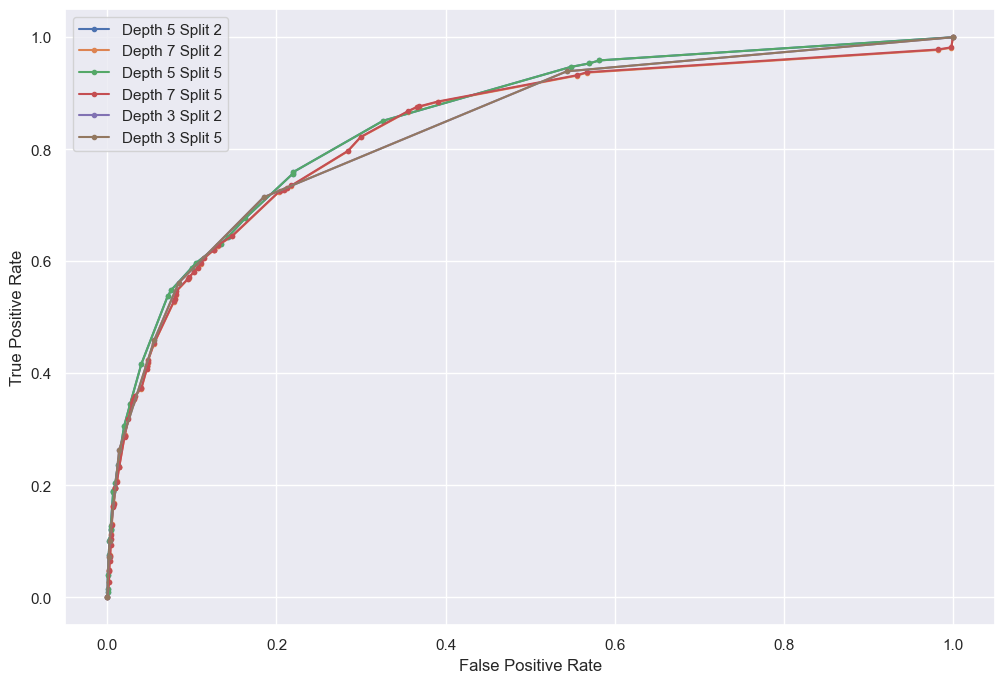

In [470]:
X = df_onehot.loc[:, df_onehot.columns != 'hospital_death']
y = df_onehot[['hospital_death']]

import matplotlib.pyplot as plt

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
dt_5_2 = DecisionTreeClassifier(max_depth=5, min_samples_split= 10)  
fit_model(dt_5_2, "Depth 5 Split 2") #BEST

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") #BEST

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 

dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(dt_3_2, "Depth 3 Split 2") 

dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [458]:
hospital_death = dt_5_2.predict(df_onehotTest)


In [466]:
#predicitng using grid searches best model
hospital_death = best_model.predict(df_onehotTest)


In [467]:
hospital_death

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [468]:
len(hospital_death)

30000

In [469]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', df_onehotTest['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
pd.DataFrame(predictions).to_csv('predictions.csv', index=False)


In [471]:
TrainWithnoChanges = pd.read_csv("Data/train.csv")
TestWithnoChanges = pd.read_csv("Data/test.csv")

Will not be performing feature extraction

In [472]:
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

# fill null values with median for temp_apache
TrainWithnoChanges['temp_apache'].fillna(TrainWithnoChanges['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
TrainWithnoChanges['d1_potassium_max'].fillna(TrainWithnoChanges['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
TrainWithnoChanges['apache_4a_hospital_death_prob'].fillna(TrainWithnoChanges['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
TrainWithnoChanges['apache_4a_icu_death_prob'].fillna(TrainWithnoChanges['apache_4a_icu_death_prob'].median(), inplace=True)


In [473]:
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

# fill null values with median for temp_apache
TestWithnoChanges['temp_apache'].fillna(TestWithnoChanges['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
TestWithnoChanges['d1_potassium_max'].fillna(TestWithnoChanges['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
TestWithnoChanges['apache_4a_hospital_death_prob'].fillna(TestWithnoChanges['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
TestWithnoChanges['apache_4a_icu_death_prob'].fillna(TestWithnoChanges['apache_4a_icu_death_prob'].median(), inplace=True)


In [477]:
# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = TestWithnoChanges.groupby('apache_2_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
TestWithnoChanges['age'] = TestWithnoChanges.apply(fill_age, axis=1)


In [478]:
# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = TrainWithnoChanges.groupby('apache_2_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
TrainWithnoChanges['age'] = TrainWithnoChanges.apply(fill_age, axis=1)


In [479]:
# fill null values with mean for numerical columns and mode for categorical columns
for col in TestWithnoChanges.columns:
    if TestWithnoChanges[col].dtype == 'object':
        TestWithnoChanges[col].fillna(TestWithnoChanges[col].mode()[0], inplace=True) #mode if object
    else:
        TestWithnoChanges[col].fillna(TestWithnoChanges[col].mean(), inplace=True)


In [480]:
# fill null values with mean for numerical columns and mode for categorical columns
for col in TrainWithnoChanges.columns:
    if TrainWithnoChanges[col].dtype == 'object':
        TrainWithnoChanges[col].fillna(TrainWithnoChanges[col].mode()[0], inplace=True) #mode if object
    else:
        TrainWithnoChanges[col].fillna(TrainWithnoChanges[col].mean(), inplace=True)


In [484]:
TrainWithnoChanges.isnull().sum()

RecordID                         0
hospital_id                      0
icu_id                           0
ethnicity                        0
gender                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
apache_3j_bodysystem             0
apache_2_bodysystem              0
age                              0
elective_surgery                 0
pre_icu_los_days                 0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_min                    0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_mbp_min          

In [485]:
TrainWithnoChanges['icu_type'].value_counts()


Med-Surg ICU    27852
MICU             4539
Neuro ICU        4309
CCU-CTICU        3872
SICU             3030
Cardiac ICU      2676
CSICU            2238
CTICU            1484
Name: icu_type, dtype: int64

In [486]:
TestWithnoChanges['icu_type'].value_counts()

Med-Surg ICU    16728
MICU             2764
Neuro ICU        2601
CCU-CTICU        2302
SICU             1748
Cardiac ICU      1549
CSICU            1350
CTICU             958
Name: icu_type, dtype: int64

In [487]:
#put the replace code i did above
TrainWithnoChanges['icu_type'] = TrainWithnoChanges['icu_type'].replace(['Cardiac ICU', 'CSICU', 'CTICU', 'CCU-CTICU'], 'Cardiac related')

In [489]:
#put replace code for test as well
TestWithnoChanges['icu_type'] = TrainWithnoChanges['icu_type'].replace(['Cardiac ICU', 'CSICU', 'CTICU', 'CCU-CTICU'], 'Cardiac related')

In [491]:
TrainWithnoChanges['apache_2_bodysystem'] = TrainWithnoChanges['apache_2_bodysystem'].replace(['Undefined Diagnoses'], 'Undefined diagnoses')

In [493]:
#do above code for test as well
TestWithnoChanges['apache_2_bodysystem'] = TestWithnoChanges['apache_2_bodysystem'].replace(['Undefined Diagnoses'], 'Undefined diagnoses')

In [498]:
#write the onedummies code for Train data
df_onehotNC = pd.get_dummies(TrainWithnoChanges)

In [499]:
#do same for test 
df_onehotTestNC = pd.get_dummies(TestWithnoChanges)


In [500]:
#tell shape of ptest and train
df_onehotNC.shape


(50000, 92)

In [502]:
#tell shape of train
df_onehotTestNC.shape

(30000, 91)

In [503]:
xNC=df_onehotNC.loc[:, df_onehotNC.columns != 'hospital_death']
yNC=df_onehotNC[['hospital_death']]

In [513]:
trainXN, testXN, trainyN, testyN = train_test_split(xNC, yNC, test_size=0.3, random_state=2)

In [516]:
def fit_model(model, model_name):
    model.fit(trainX,trainyN)
    md_probs = model.predict_proba(testXN)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testyN, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testyN, md_probs)
    plt.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.8468927091831308
Depth 7 Split 2  :  0.8458366912694345
Depth 5 Split 5  :  0.8468927091831308
Depth 7 Split 5  :  0.8480055154082677
Depth 3 Split 2  :  0.8349969520381741
Depth 3 Split 5  :  0.8349969520381741


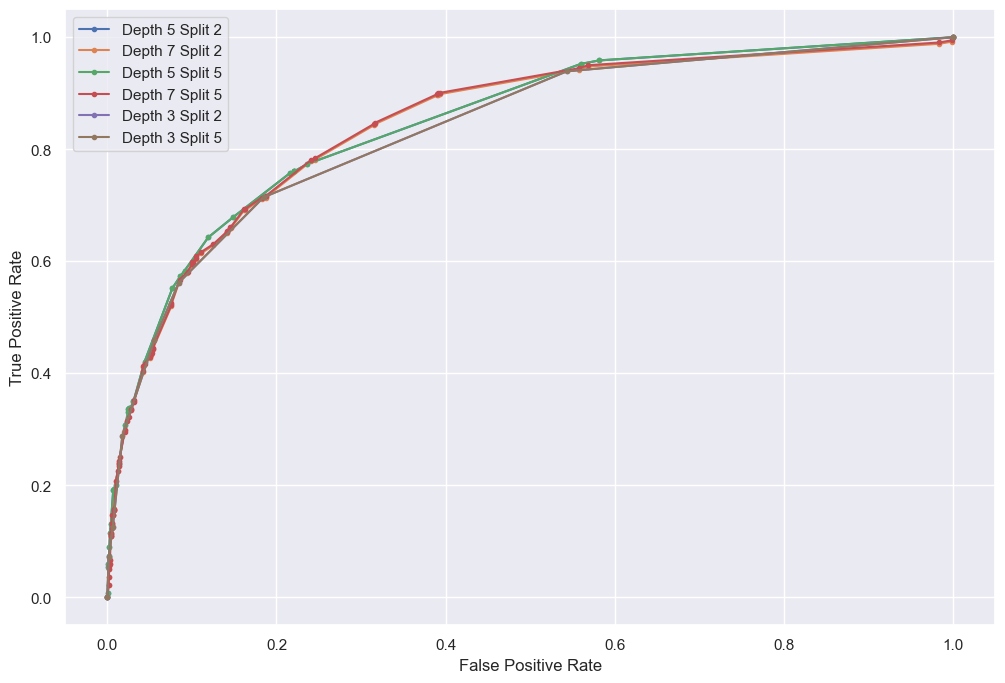

In [526]:
import matplotlib.pyplot as plt

trainX, testX, trainy, testy = train_test_split(xNC, yNC, test_size=0.3, random_state=2)
NCdt_5_2 = DecisionTreeClassifier(max_depth=5, min_samples_split= 10)  
fit_model(NCdt_5_2, "Depth 5 Split 2") #BEST

NCdt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(NCdt_7_2, "Depth 7 Split 2") 

NCdt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=3)  
fit_model(NCdt_5_5, "Depth 5 Split 5") #BEST

NCdt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(NCdt_7_5, "Depth 7 Split 5") #BEST

NCdt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(NCdt_3_2, "Depth 3 Split 2") 

NCdt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(NCdt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [527]:
#predict
hospital_death = NCdt_7_5.predict(df_onehotTestNC)

In [529]:
#put it in csv with record id
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])
#put record id
predictions_df.insert(0, 'RecordID', df_onehotTestNC['RecordID'])
# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [532]:
#another one but this time without one hot encoding and doing the others thing
import pandas as pd

TrainNoothers = pd.read_csv("Data/train.csv")

# fill null values with median for temp_apache
TrainNoothers['temp_apache'].fillna(TrainNoothers['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
TrainNoothers['d1_potassium_max'].fillna(TrainNoothers['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
TrainNoothers['apache_4a_hospital_death_prob'].fillna(TrainNoothers['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
TrainNoothers['apache_4a_icu_death_prob'].fillna(TrainNoothers['apache_4a_icu_death_prob'].median(), inplace=True)

TestNoothers = pd.read_csv("Data/test.csv")
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

# fill null values with median for temp_apache
TestNoothers['temp_apache'].fillna(TestNoothers['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
TestNoothers['d1_potassium_max'].fillna(TestNoothers['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
TestNoothers['apache_4a_hospital_death_prob'].fillna(TestNoothers['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
TestNoothers['apache_4a_icu_death_prob'].fillna(TestNoothers['apache_4a_icu_death_prob'].median(), inplace=True)

# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = TrainNoothers.groupby('apache_2_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
TrainNoothers['age'] = TrainNoothers.apply(fill_age, axis=1)

# fill null values with mean for numerical columns and mode for categorical columns
for col in TestNoothers.columns:
    if TestNoothers[col].dtype == 'object':
        TestNoothers[col].fillna(TestNoothers[col].mode()[0], inplace=True) #mode if object
    else:
        TestNoothers[col].fillna(TestNoothers[col].mean(), inplace=True)
# fill null values with mean for numerical columns and mode for categorical columns
for col in TrainNoothers.columns:
    if TrainNoothers[col].dtype == 'object':
        TrainNoothers[col].fillna(TrainNoothers[col].mode()[0], inplace=True) #mode if object
    else:
        TrainNoothers[col].fillna(TrainNoothers[col].mean(), inplace=True)


#do same for test 
df_onehotTestOther = pd.get_dummies(TestNoothers)
#write the onedummies code for Train data
df_onehotOther= pd.get_dummies(TrainNoothers)

        



In [537]:
xNC=df_onehotOther.loc[:, df_onehotOther.columns != 'hospital_death']
yNC=df_onehotOther[['hospital_death']]


In [538]:
def fit_model(model, model_name):
    model.fit(trainX,trainyN)
    md_probs = model.predict_proba(testXN)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testyN, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testyN, md_probs)
    plt.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

In [542]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter values that should be searched
max_depth_values = list(range(1, 11)) # depth of the tree
min_samples_split_values = list(range(2, 11)) # minimum number of samples required to split an internal node

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=max_depth_values, min_samples_split=min_samples_split_values)

# Instantiate the grid
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

trainXN, testXN, trainyN, testyN = train_test_split(xNC, yNC, test_size=0.3, random_state=2)
# Fit the grid with data
grid.fit(trainXN, trainyN)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
best_model = grid.best_estimator_


{'mean_fit_time': array([0.28013151, 0.2595288 , 0.24986866, 0.24611044, 0.24734752,
       0.24815352, 0.24587574, 0.24870555, 0.24813662, 0.41924875,
       0.4157393 , 0.41806178, 0.40488865, 0.41430466, 0.40259006,
       0.42315879, 0.44043331, 0.4230022 , 0.59378574, 0.60016921,
       0.59077322, 0.59318202, 0.59298551, 0.59054005, 0.65152054,
       0.75167112, 0.73030827, 1.05736067, 0.8981853 , 0.84840775,
       0.83107076, 0.81428261, 0.85711026, 0.84235725, 0.91162834,
       0.81539395, 1.08968472, 1.07659841, 1.3500828 , 1.4425415 ,
       1.30950408, 1.17768602, 1.18985026, 1.10104415, 1.13202415,
       1.33346643, 1.3147275 , 1.31765261, 1.29704912, 1.36774895,
       1.37556233, 1.48463986, 1.67437356, 1.80938888, 1.71803541,
       1.91363754, 1.97709565, 1.89617198, 1.88799398, 1.83236017,
       1.74042709, 1.79162431, 1.72689755, 1.93320284, 1.57354634,
       2.07682455, 1.41793468, 1.31563475, 1.88844192, 1.98106611,
       2.12741861, 2.02563272, 2.1221916 , 2

In [543]:
#predicitng using grid searches best model
hospital_death = best_model.predict(df_onehotTestOther)


In [545]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', df_onehotTest['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)